##Graph1

#Trend recognization using hpfilter

<ipython-input-7-60aef219a40a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)


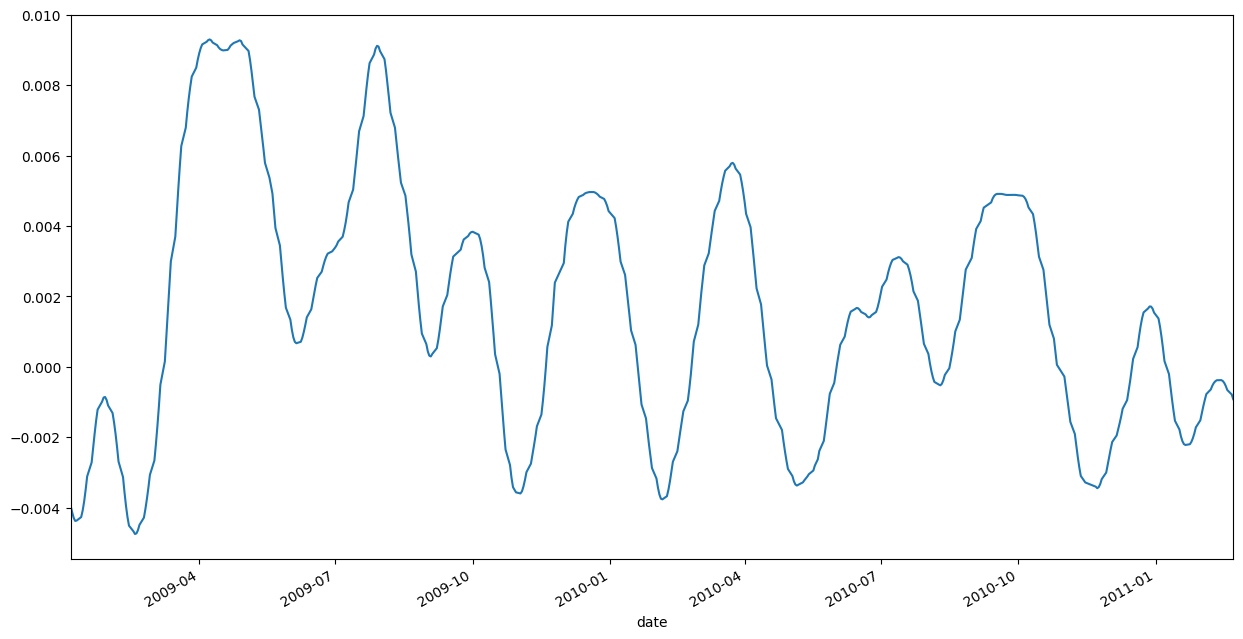

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)
ISE_cycle,ISE_trend = hpfilter(df['ISE'],lamb=1600)#1600 quaterly data
ISE_trend.plot(figsize=(15,8)).autoscale(axis='x',tight=True)

In graph1 the trend is fluctuating but at the same time going downwards

##Graph 2

##Detrending using function build from scratch

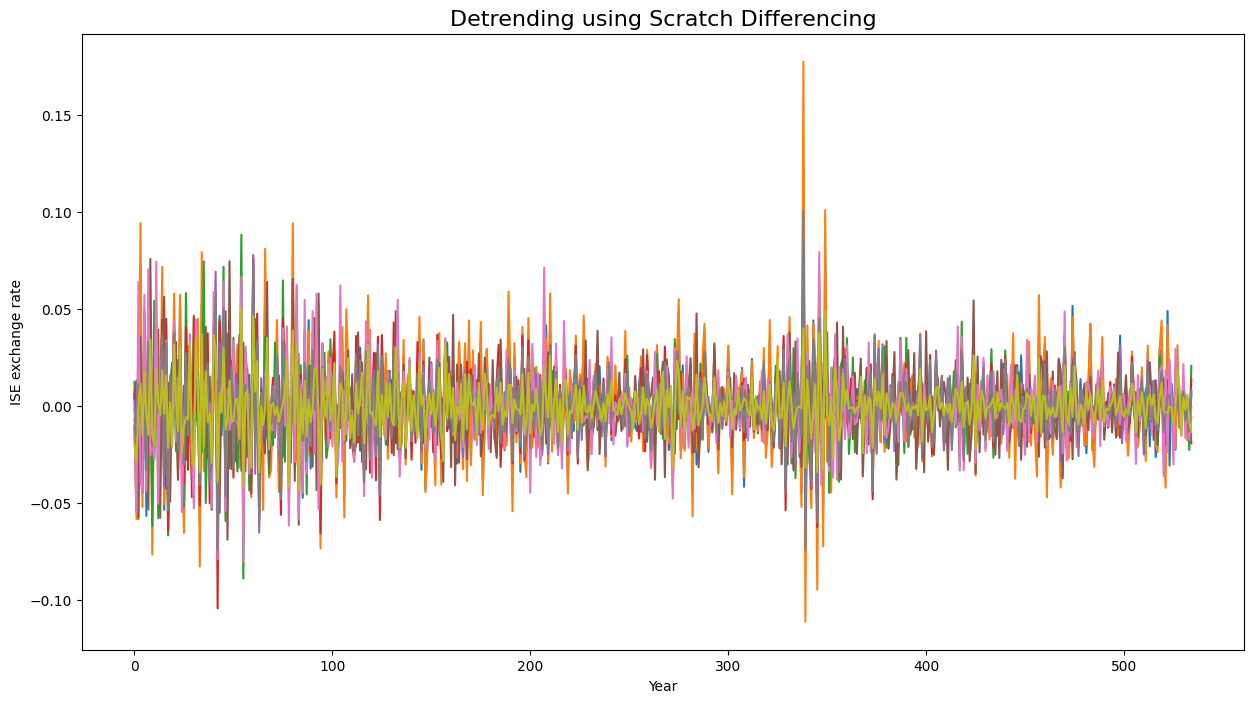

In [ ]:
import datetime
import matplotlib.pyplot as plt

series= pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)
X=series.values
diff=list()
for i in range(1,len(X)):
  value=X[i]-X[i-1]
  diff.append(value)
plt.figure(figsize=(15,8))
plt.plot(diff)
plt.title('Detrending using Scratch Differencing',fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE exchange rate')
plt.show()

In graph2 there is a big fluctuation between 300-400 year time frame. Then after that the graph has constant pattern  

##Graph 3

##Detrending using pandas difference function

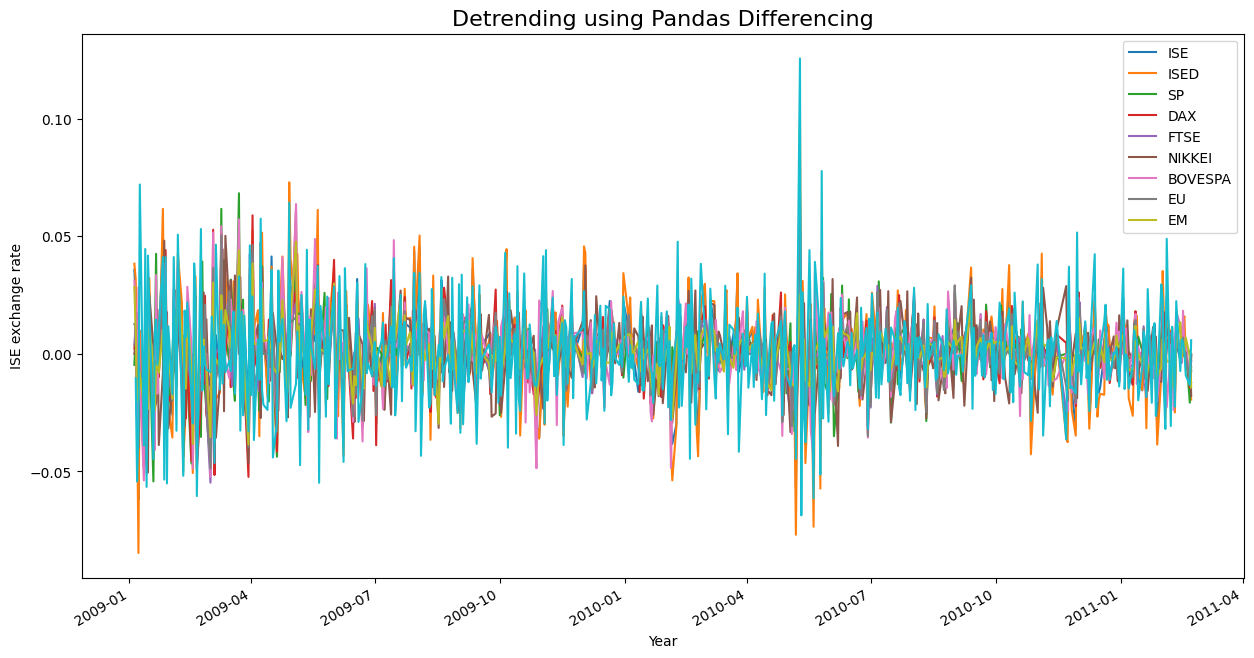

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df= pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)
df.plot(figsize=(15,8))
diff=df.ISE.diff()
plt.plot(diff)
plt.title('Detrending using Pandas Differencing',fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE exchange rate')
plt.show()

In graph3 there is big fluctuation in the difference of the ISE exchange rates between January 2009 to April 2009 and April 2010 to July 2010. While the other exhange rates show constant fluctuation in the differences.The graph shows high volatility of the ISE stock

##Graph 4

##Detrending using SciPy function

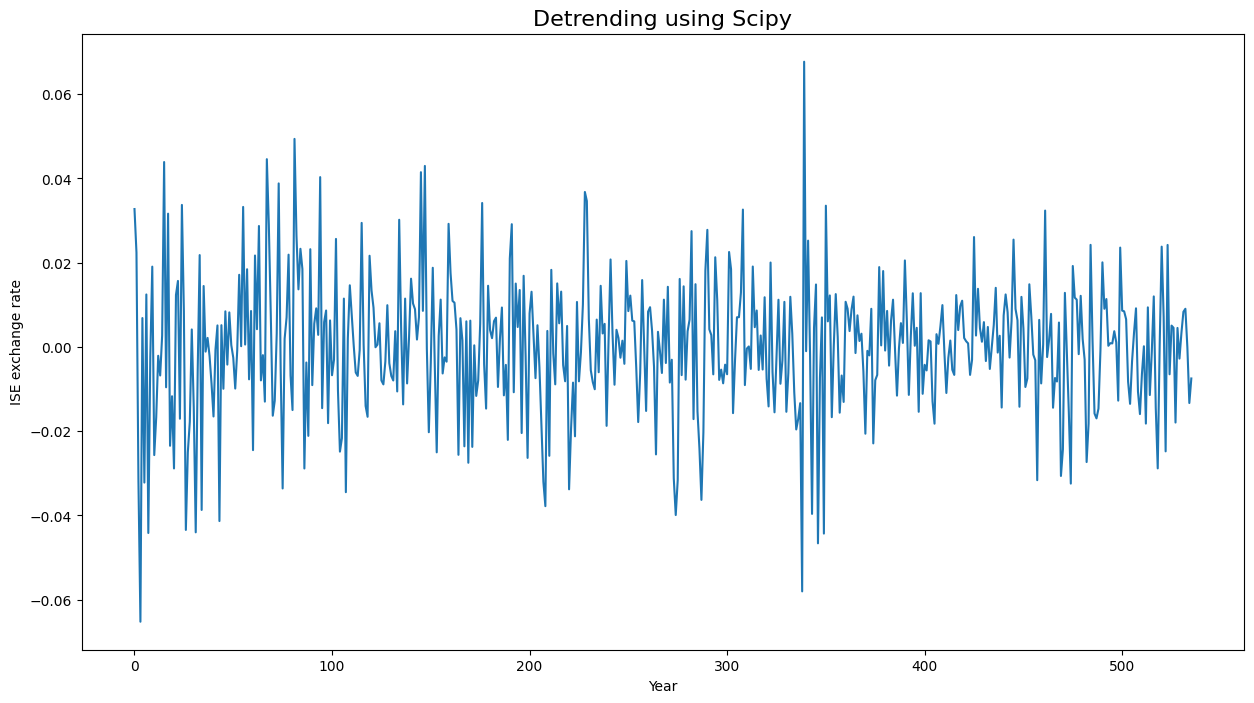

In [ ]:
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
df= pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)
detrended=signal.detrend(df['ISE'])
plt.figure(figsize=(15,8))
plt.plot(detrended)
plt.title('Detrending using Scipy',fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE exchange rate')
plt.show()

##Graph 5

#Detrending using Statsmodels

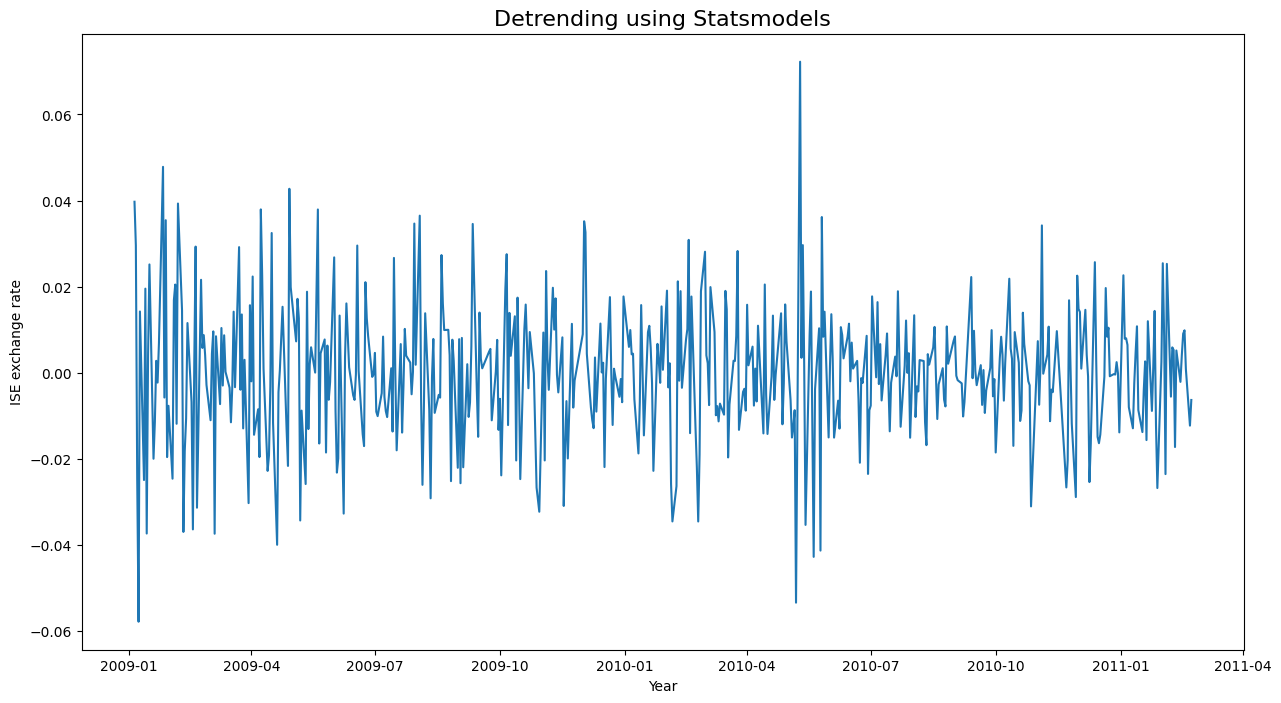

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv(r'/content/istambul_stock_exchange',index_col=0,parse_dates=True)
ISE_cycle,ISE_trend=hpfilter(df['ISE'],lamb=1600)
df['trend']=ISE_trend
detrended = df['ISE'] - df['trend']
plt.figure(figsize=(15,8))
plt.plot(detrended)
plt.title('Detrending using Statsmodels',fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE exchange rate')
plt.show()

Graph5 shows that between January2009 to April2009 and April2010 to July2010 there are great fluctuations in the ISE exchange rate